In [ ]:
pip install tensorflow==2.1.0 pandas sklearn keras matplotlib

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from py_session import py_session
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

try:
  # Use the %tensorflow_version magic if in colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import collections
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
from unittest.mock import Mock
import time




In [9]:
le= LabelEncoder()

In [10]:
datasetScenearioB120 = pd.read_csv("datasetScenearioB120.csv", header=None, 
 names=['duration',
 'total_fiat',
 'total_biat',
 'min_fiat',
 'min_biat',
 'max_fiat',
 'max_biat',
 'mean_fiat',
 'mean_biat',
 'flowPktsPerSecond',
 'flowBytesPerSecond',
 'min_flowiat',
 'max_flowiat',
 'mean_flowiat',
 'std_flowiat',
 'min_active',
 'mean_active',
 'max_active',
 'std_active',
 'min_idle',
 'mean_idle',
 'max_idle',
 'std_idle',
 'class'])

In [11]:
datasetScenearioB120['encoded_class']=le.fit_transform(datasetScenearioB120['class'])

In [12]:
le.classes_

array(['BROWSING', 'CHAT', 'FT', 'MAIL', 'P2P', 'STREAMING', 'VOIP',
       'VPN-BROWSING', 'VPN-CHAT', 'VPN-FT', 'VPN-MAIL', 'VPN-P2P',
       'VPN-STREAMING', 'VPN-VOIP'], dtype=object)

In [13]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'BROWSING': 0, 'CHAT': 1, 'FT': 2, 'MAIL': 3, 'P2P': 4, 'STREAMING': 5, 'VOIP': 6, 'VPN-BROWSING': 7, 'VPN-CHAT': 8, 'VPN-FT': 9, 'VPN-MAIL': 10, 'VPN-P2P': 11, 'VPN-STREAMING': 12, 'VPN-VOIP': 13}


In [14]:
np.unique(datasetScenearioB120['encoded_class'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [15]:
datasetScenearioB120=datasetScenearioB120.drop(columns=['class'])

In [16]:
datasetB120Norm=((datasetScenearioB120-datasetScenearioB120.mean())/(datasetScenearioB120.std()))

In [17]:
datasetB120Norm['encoded_class']=datasetScenearioB120['encoded_class']

In [19]:
datasetB120Norm

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,encoded_class
0,1.387643,-0.311477,-0.276861,0.628009,0.823722,-0.411613,-0.392982,-0.162273,-0.155449,-0.211480,...,-0.355567,-0.378909,-0.325365,0.526630,0.521968,-0.381806,-0.351999,0.545133,0.554642,1
1,1.433055,-0.311477,-0.276861,0.628704,0.818574,-0.409091,-0.394245,-0.155295,-0.162247,-0.211482,...,-0.354658,-0.376179,-0.345179,0.524956,0.468308,-0.382291,-0.360140,0.541502,0.495028,1
2,0.876661,-0.311476,-0.276861,0.261788,0.379124,-0.376589,-0.349008,-0.042972,0.009202,-0.211525,...,-0.263476,-0.331239,-0.176311,0.190405,0.661566,-0.374314,-0.195001,0.200576,0.753111,1
3,0.396602,-0.311477,-0.276861,0.320534,0.449830,-0.396896,-0.378565,-0.100082,-0.083194,-0.211505,...,-0.312051,-0.371975,-0.201415,0.239987,0.728475,-0.377779,-0.223393,0.255431,0.760556,1
4,1.441082,1.925923,2.154681,0.452196,0.613841,1.628258,1.811737,-0.381014,-0.464994,-0.211567,...,0.944604,0.600347,0.496862,0.359364,-0.368088,0.610032,0.508947,0.380876,-0.358025,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10777,-0.849416,-0.311478,-0.276861,-0.564611,-0.609334,-0.444381,-0.434757,-0.381086,-0.465127,-0.211236,...,-0.524469,-0.425529,-0.512487,-0.581572,-0.368185,-0.418916,-0.501611,-0.566270,-0.358043,4
10778,-0.847825,-0.311478,-0.276861,-0.564611,-0.609334,-0.444381,-0.434757,-0.381086,-0.465127,-0.211362,...,-0.524469,-0.425529,-0.512487,-0.581572,-0.368185,-0.418916,-0.501611,-0.566270,-0.358043,4
10779,-0.450740,1.254690,-0.276861,0.147106,-0.609334,1.006467,-0.434757,-0.381086,-0.465127,-0.211566,...,0.650789,-0.376570,-0.159215,0.032137,1.133178,-0.369720,-0.146733,0.052654,1.177950,4
10780,-0.848151,-0.311467,-0.276861,-0.561198,-0.605174,-0.440898,-0.432209,-0.374869,-0.458354,-0.210785,...,-0.519675,-0.425529,-0.512487,-0.581572,-0.368185,-0.418916,-0.501611,-0.566270,-0.358043,4


In [20]:
datasetB120Norm.describe()

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,encoded_class
count,1.078200e+04,10782.000000,1.078200e+04,1.078200e+04,1.078200e+04,1.078200e+04,1.078200e+04,1.078200e+04,1.078200e+04,1.078200e+04,...,1.078200e+04,1.078200e+04,1.078200e+04,1.078200e+04,10782.000000,1.078200e+04,1.078200e+04,1.078200e+04,1.078200e+04,10782.000000
mean,-4.217653e-17,0.000000,-2.108827e-17,-1.054413e-17,2.636033e-17,-6.326480e-17,-6.326480e-17,1.054413e-17,9.489719e-17,1.054413e-17,...,1.054413e-17,-1.054413e-17,1.581620e-17,-1.028053e-16,0.000000,-1.054413e-17,-3.690446e-17,-2.108827e-17,7.644496e-17,5.480801
std,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.032972
min,-8.520228e-01,-0.311478,-2.768612e-01,-5.646108e-01,-6.093342e-01,-4.443812e-01,-4.347565e-01,-3.810858e-01,-4.651273e-01,-2.115688e-01,...,-5.244692e-01,-4.255293e-01,-5.124872e-01,-5.815716e-01,-0.368185,-4.189158e-01,-5.016114e-01,-5.662702e-01,-3.580430e-01,0.000000
25%,-8.499366e-01,-0.311478,-2.768612e-01,-5.645392e-01,-6.093342e-01,-4.443383e-01,-4.347565e-01,-3.810858e-01,-4.651273e-01,-2.115625e-01,...,-5.244481e-01,-4.255293e-01,-5.124872e-01,-5.815716e-01,-0.368185,-4.189158e-01,-5.016114e-01,-5.662702e-01,-3.580430e-01,1.000000
50%,-6.552464e-01,-0.311474,-2.768599e-01,-5.387084e-01,-5.893271e-01,-4.337278e-01,-4.299450e-01,-3.787320e-01,-4.626343e-01,-2.114707e-01,...,-5.063638e-01,-3.887143e-01,-4.589017e-01,-5.311829e-01,-0.368185,-3.842974e-01,-4.574142e-01,-5.237783e-01,-3.580430e-01,7.000000
75%,1.006762e+00,-0.311365,-2.768483e-01,3.968268e-01,4.496270e-01,-7.288666e-02,-8.100856e-02,-1.451209e-01,-1.257931e-01,-2.091966e-01,...,2.079971e-01,-5.801428e-02,1.974218e-01,3.617373e-01,-0.309898,-7.499652e-02,1.743477e-01,3.768319e-01,-3.208709e-01,9.000000
max,1.064043e+01,8.638320,9.449509e+00,1.440668e+01,2.385758e+01,1.005699e+01,8.551218e+00,1.841982e+01,1.080186e+01,4.516321e+01,...,1.260537e+01,2.014053e+01,1.970814e+01,1.828056e+01,19.337203,2.020213e+01,1.977716e+01,1.841518e+01,1.980187e+01,13.000000


In [22]:
datasetScenearioB60 = pd.read_csv("datasetScenearioB60.csv", header=None, 
 names=['duration',
 'total_fiat',
 'total_biat',
 'min_fiat',
 'min_biat',
 'max_fiat',
 'max_biat',
 'mean_fiat',
 'mean_biat',
 'flowPktsPerSecond',
 'flowBytesPerSecond',
 'min_flowiat',
 'max_flowiat',
 'mean_flowiat',
 'std_flowiat',
 'min_active',
 'mean_active',
 'max_active',
 'std_active',
 'min_idle',
 'mean_idle',
 'max_idle',
 'std_idle',
 'class'])

In [23]:
datasetScenearioB60['encoded_class']=le.fit_transform(datasetScenearioB60['class'])

In [26]:
datasetScenearioB60=datasetScenearioB60.drop(columns=['class'])

In [27]:
datasetB60Norm=((datasetScenearioB60-datasetScenearioB60.mean())/(datasetScenearioB60.std()))

In [28]:
datasetB60Norm['encoded_class']=datasetScenearioB60['encoded_class']

In [33]:
datasetScenearioB30 = pd.read_csv("datasetScenearioB30.csv", header=None, 
 names=['duration',
 'total_fiat',
 'total_biat',
 'min_fiat',
 'min_biat',
 'max_fiat',
 'max_biat',
 'mean_fiat',
 'mean_biat',
 'flowPktsPerSecond',
 'flowBytesPerSecond',
 'min_flowiat',
 'max_flowiat',
 'mean_flowiat',
 'std_flowiat',
 'min_active',
 'mean_active',
 'max_active',
 'std_active',
 'min_idle',
 'mean_idle',
 'max_idle',
 'std_idle',
 'class'])

In [34]:
datasetScenearioB30['encoded_class']=le.fit_transform(datasetScenearioB30['class'])

In [37]:
datasetScenearioB30=datasetScenearioB30.drop(columns=['class'])

In [38]:
datasetB30Norm=((datasetScenearioB30-datasetScenearioB30.mean())/(datasetScenearioB30.std()))

In [39]:
datasetB30Norm['encoded_class']=datasetScenearioB30['encoded_class']

In [44]:
datasetScenearioB15 = pd.read_csv("datasetScenearioB15.csv", header=None, 
 names=['duration',
 'total_fiat',
 'total_biat',
 'min_fiat',
 'min_biat',
 'max_fiat',
 'max_biat',
 'mean_fiat',
 'mean_biat',
 'flowPktsPerSecond',
 'flowBytesPerSecond',
 'min_flowiat',
 'max_flowiat',
 'mean_flowiat',
 'std_flowiat',
 'min_active',
 'mean_active',
 'max_active',
 'std_active',
 'min_idle',
 'mean_idle',
 'max_idle',
 'std_idle',
 'class'])

In [45]:
datasetScenearioB15['encoded_class']=le.fit_transform(datasetScenearioB15['class'])

In [49]:
datasetB15Norm=((datasetScenearioB15-datasetScenearioB15.mean())/(datasetScenearioB15.std()))

In [50]:
datasetB15Norm['encoded_class']=datasetScenearioB15['encoded_class']

In [53]:
dataNorm=datasetB120Norm

In [54]:
dataNorm=dataNorm.append(datasetB60Norm, ignore_index=True)
dataNorm=dataNorm.append(datasetB30Norm, ignore_index=True)
dataNorm=dataNorm.append(datasetB15Norm, ignore_index=True)

In [55]:
dataNorm.dtypes

duration              float64
total_fiat            float64
total_biat            float64
min_fiat              float64
min_biat              float64
max_fiat              float64
max_biat              float64
mean_fiat             float64
mean_biat             float64
flowPktsPerSecond     float64
flowBytesPerSecond    float64
min_flowiat           float64
max_flowiat           float64
mean_flowiat          float64
std_flowiat           float64
min_active            float64
mean_active           float64
max_active            float64
std_active            float64
min_idle              float64
mean_idle             float64
max_idle              float64
std_idle              float64
encoded_class           int32
dtype: object

In [60]:
df_total_numeric_features=dataNorm[['duration',
 'total_fiat',
 'total_biat',
 'min_fiat',
 'min_biat',
 'max_fiat',
 'max_biat',
 'mean_fiat',
 'mean_biat',
 'flowPktsPerSecond',
 'flowBytesPerSecond',
 'min_flowiat',
 'max_flowiat',
 'mean_flowiat',
 'std_flowiat',
 'min_active',
 'mean_active',
 'max_active',
 'std_active',
 'min_idle',
 'mean_idle',
 'max_idle',
 'std_idle']].to_numpy()

In [61]:
df_total_numeric_label=dataNorm[['encoded_class']].to_numpy()

In [62]:
ohe_label = to_categorical(df_total_numeric_label)

In [63]:
ohe_label[3000]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
      dtype=float32)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(df_total_numeric_features, ohe_label,
                                                    stratify=ohe_label, 
                                                    test_size=0.2)

In [65]:

(unique, counts) = np.unique(y_train, return_counts=True,axis=0)

In [66]:
unique

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [67]:
counts

array([4461,  892, 2732, 1955, 3763, 2271, 8000, 5188, 1027, 3200, 1091,
       3180, 2004, 8000], dtype=int64)

In [68]:

(unique, counts) = np.unique(y_test, return_counts=True,axis=0)

In [70]:
counts

array([1115,  223,  683,  489,  941,  568, 2000, 1297,  257,  800,  273,
        795,  501, 2000], dtype=int64)

In [71]:
total_test=len(X_test)
total_test

11942

In [72]:
total_train=len(X_train)
total_train

47764

In [73]:
np.random.seed(1000)

In [74]:
x_train, y_train = shuffle(X_train, y_train, random_state=1000)
x_test, y_test = shuffle(X_test, y_test, random_state=1000)

In [75]:
len(x_train)

47764

In [76]:
len(x_test)

11942

In [78]:
y_train=y_train.astype('int32')

In [79]:
x_train=x_train.astype('float32')

In [80]:
x_train[1].shape

(23,)

In [81]:
x_train[1]

array([ 0.641562  ,  1.8092009 , -0.2944038 ,  0.16366076, -0.5367779 ,
        1.3609217 , -0.41253585, -0.24421988, -0.3913783 , -0.12530112,
       -0.05348335, -0.08167353, -0.36572957, -0.41074598, -0.3564173 ,
       -0.30285597, -0.33993265, -0.38531542, -0.30919954, -0.2946835 ,
       -0.32876176, -0.3698325 , -0.292495  ], dtype=float32)

In [84]:
y_test=y_test.astype('int32')

In [85]:
x_test=x_test.astype('float32')

In [87]:
Epochs=1000

In [89]:
 model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(23,)), 

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(14, activation='softmax')
      
    ])
    


In [90]:
loss_fn=tf.keras.losses.CategoricalCrossentropy()

In [91]:
model_1.compile(optimizer='sgd',
              loss=loss_fn,
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [92]:
filepath="ScenarioB-weights-best.hdf5"

In [93]:
from tensorflow.keras.callbacks import ModelCheckpoint 

In [95]:
checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
start = time.time()
model_1_fitted = model_1.fit(x_train, y_train, batch_size=100, epochs=Epochs, validation_data=(x_test, y_test), callbacks=callbacks_list, verbose=0)
end = time.time()
print(end - start)
model1_trainig_time=end - start

Epoch 00001: val_categorical_accuracy improved from -inf to 0.xxx, saving model to ScenarioB-weights-best.hdf5xxx

Epoch 00002: val_categorical_accuracy improved from 0.xxx to 0.xxx, saving model to ScenarioB-weights-best.hdf5

Epoch 00003: val_categorical_accuracy improved from 0.xxx to 0.xxx, saving model to ScenarioB-weights-best.hdf5

Epoch 00004: val_categorical_accuracy did not improve from 0.xxx

Epoch 00005: val_categorical_accuracy improved from 0.xxx to 0.xxx, saving model to ScenarioB-weights-best.hdf5

``` python
model_1_fitted.history={
    'loss': [],
    'categorical_accuracy': [],
    'val_loss': [],
    'val_categorical_accuracy': []
}
```

In [ ]:
model_1.get_weights()

In [99]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               12288     
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               2

In [87]:
model_1.load_weights('ScenarioB-weights-best.hdf5')

In [88]:
from sklearn.metrics import classification_report

In [89]:
y_pred = model_1.predict(x_test)

In [90]:
y_pred_bool = np.argmax(y_pred, axis=1)

In [91]:
y_test_bool = np.argmax(y_test, axis=1)

In [92]:
print(classification_report(y_test_bool, y_pred_bool))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      2000
           1       0.81      0.73      0.77       501
           2       0.87      0.72      0.79       795
           3       0.65      0.66      0.65       273
           4       0.82      0.86      0.84       800
           5       0.85      0.72      0.78       257
           6       0.77      0.96      0.85      1297
           7       0.88      0.84      0.86      2000
           8       0.84      0.77      0.81       568
           9       0.85      0.80      0.83       941
          10       0.73      0.86      0.79       489
          11       0.62      0.77      0.69       683
          12       0.98      0.85      0.91       223
          13       0.85      0.66      0.74      1115

    accuracy                           0.82     11942
   macro avg       0.82      0.79      0.80     11942
weighted avg       0.83      0.82      0.82     11942



In [9]:
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [11]:
import matplotlib.pyplot as plt

In [12]:
plt.rcParams.update({'font.size': 10})

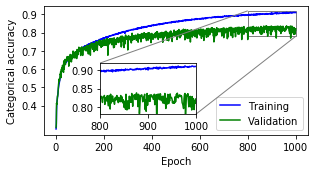

In [54]:
fig, ax = plt.subplots(figsize=(12.0/2.54, 6.0/2.54)) # create a new figure with a default 111 subplot
ax.plot(t, model_1_fitted.history['categorical_accuracy'][:display_epoch],'b',t, model_1_fitted.history['val_categorical_accuracy'][:display_epoch],'g')
plt.legend(['Training','Validation'])
plt.ylabel('Categorical accuracy')
plt.xlabel('Epoch')
plt.yticks(np.arange(0.4, 1, 0.1))
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
axins = zoomed_inset_axes(ax, 2, loc=8, bbox_to_anchor=(145,2,3,4), borderpad=4) # zoom-factor: 2.5, location: upper-left
axins.plot(t, model_1_fitted.history['categorical_accuracy'][:display_epoch],'b',model_1_fitted.history['val_categorical_accuracy'][:display_epoch],'g')
x1, x2, y1, y2 = 800, 1000, 0.78, 0.92 # specify the limits
plt.yticks(np.arange(0.8, 0.91, 0.05))
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits
plt.show()